In [1]:
from sklearn.metrics import auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt 

import matplotlib as mpl

%matplotlib inline 

In [115]:
def delta_score(y_true, p_pred):
    """

    Args:
        y_true (array-like (n_samples, n_columns)): 
        p_pred (array-like (n_samples, n-columns)): 

    Returns:
        (array-like) the delta score value.

    """

    y_true = y_true.astype(int)
    p_pred = p_pred.astype(float)

    y_true = y_true.squeeze()
    p_pred = p_pred.squeeze()

    p_true = np.sum(y_true * p_pred, axis=1)
    p_max_false = np.max((1 - y_true) * p_pred, axis=1)

    return p_max_false - p_true


# TODO: input checks 
def sample_coverage(delta_scores, n_thresholds):

    threshold = np.linspace(-1, 1, n_thresholds)
    coverage = np.ones(n_thresholds) * float(np.nan)

    for i, tau in enumerate(threshold):
        coverage[i] = sum(delta_scores < tau) / delta_scores.shape[0]

    return threshold, coverage


# TODO: input checks 
def delta_auc_score(y_true, p_pred, n_thresholds):

    threshold, coverage = sample_coverage(delta_score(y_true, p_pred), n_thresholds)

    return auc(threshold, coverage)


def plot_sample_coverage(axis, y_true, p_pred, n_thresholds=100, color="C0"):

    threshold, coverage = sample_coverage(delta_score(y_true, p_pred), n_thresholds)

    axis.plot(threshold, coverage, color=color)
    axis.fill_between(threshold, coverage, color=color, alpha=0.3)

    axis.annotate(f"AUC = " + "{:.3f}".format(auc(threshold, coverage)), xy=(0.5, 0.05), fontsize=9)
    
    #axis.set_ylim(0, 1)
    #axis.set_xlim(-1, 1)
    
    return axis 

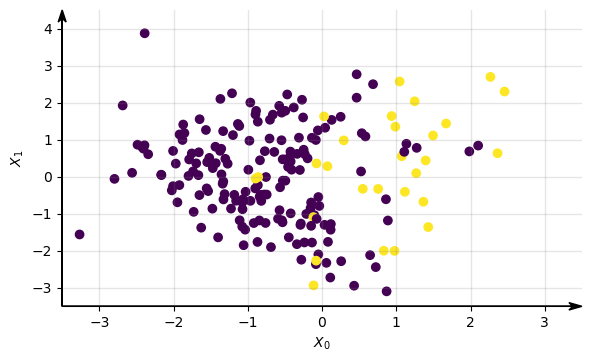

In [129]:
# illustration of synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, 
                           weights=(0.8, 0.1), flip_y=0.05, class_sep=0.9, hypercube=True, 
                           shift=0.0, scale=1.0, shuffle=True, random_state=42)

fig, axis = plt.subplots(1, 1, figsize=set_fig_size(435))
axis.scatter(X[:, 0], X[:, 1], c=y)
format_axis(axis, fig, xlim=(-3.5, 3.5), ylim=(-3.5, 4.5), n_xticks=6, xlabel=r"$X_0$", ylabel=r"$X_1$", 
            grid=True, arrowed_spines=True)

fig.tight_layout()
#fig.savefig("dataset.pdf", transparent=True, bbox_inches="tight")

In [117]:
# create dataset 
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, 
                           weights=(0.85, 0.05), flip_y=0.1, class_sep=0.5, hypercube=True, 
                           shift=0.0, scale=1.0, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit prediction model  
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

p_pred = clf.predict_proba(X_test)

# post-process model output 
ohe = OneHotEncoder()
y_test_ohe = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

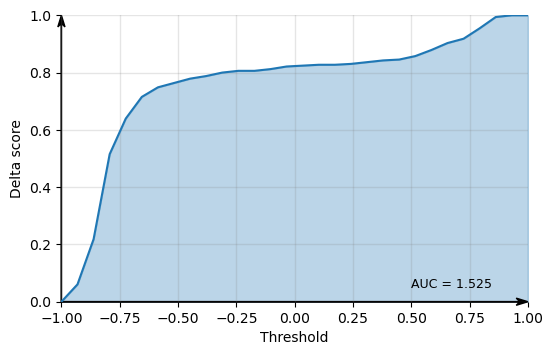

In [118]:
fig, axis = plt.subplots(1, 1, figsize=set_fig_size(435))
axis = plot_sample_coverage(axis, y_test_ohe, p_pred, n_thresholds=30)
format_axis(axis, fig, xlim=(-1, 1), ylim=(0, 1), n_xticks=6, xlabel="Threshold", ylabel="Delta score", 
            grid=True, arrowed_spines=True)

fig.tight_layout()
#fig.savefig("delta_scores.pdf", transparent=True, bbox_inches="tight")

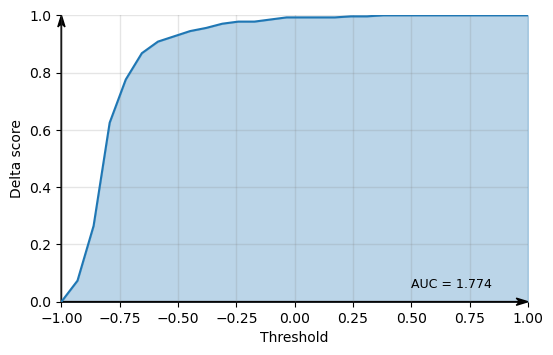

In [119]:
fig, axis = plt.subplots(1, 1, figsize=set_fig_size(435))
axis = plot_sample_coverage(axis, y_test_ohe[y_test == 0], p_pred[y_test == 0], n_thresholds=30)
format_axis(axis, fig, xlim=(-1, 1), ylim=(0, 1), n_xticks=6, xlabel="Threshold", ylabel="Delta score", 
            grid=True, arrowed_spines=True)

fig.tight_layout()
#fig.savefig("delta_scores_class0.pdf", transparent=True, bbox_inches="tight")

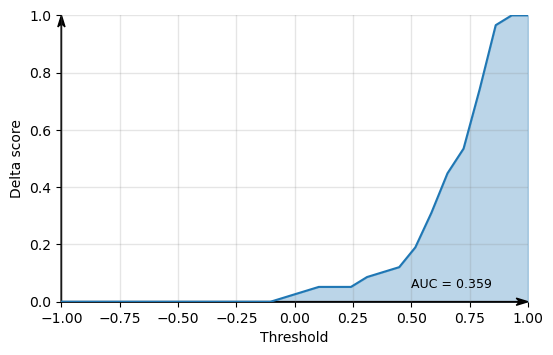

In [120]:
fig, axis = plt.subplots(1, 1, figsize=set_fig_size(435))

axis = plot_sample_coverage(axis, y_test_ohe[y_test == 1], p_pred[y_test == 1], n_thresholds=30)
format_axis(axis, fig, xlim=(-1, 1), ylim=(0, 1), n_xticks=6, xlabel="Threshold", ylabel="Delta score", 
            grid=True, arrowed_spines=True)

fig.tight_layout()
#fig.savefig("delta_scores_class1.pdf", transparent=True, bbox_inches="tight")